<a href="https://colab.research.google.com/github/seuha516/MachineLearningPractice/blob/main/ANNforText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**텍스트**를 위한 **인공 신경망**

##Data

In [1]:
from tensorflow.keras.datasets import imdb
(train_input,train_target),(test_input,test_target)=imdb.load_data(num_words=500)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
print(train_input.shape,test_input.shape)

(25000,) (25000,)


In [3]:
print(len(train_input[0]))
print(len(train_input[1]))
print(train_input[0])

218
189
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [4]:
#0: 부정, 1: 긍정
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [5]:
from sklearn.model_selection import train_test_split
train_input,val_input,train_target,val_target=train_test_split(train_input,train_target,test_size=0.2,random_state=42)

In [6]:
import numpy as np
lengths=np.array([len(x) for x in train_input])

print(np.mean(lengths),np.median(lengths))

239.00925 178.0


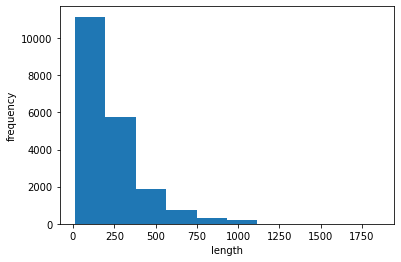

In [7]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [8]:
#모든 리뷰의 길이를 100으로
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq=pad_sequences(train_input,maxlen=100)
val_seq=pad_sequences(val_input,maxlen=100)

print(train_seq.shape)

(20000, 100)


In [9]:
print(train_seq[0])
print(train_input[0][-10:])
print(train_seq[5])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]
[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


##RNN

###Build

In [11]:
from tensorflow import keras

model=keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [12]:
train_oh=keras.utils.to_categorical(train_seq)
val_oh=keras.utils.to_categorical(val_seq)
print(train_oh.shape)

(20000, 100, 500)


In [13]:
print(train_oh[0][0][:12])
print(np.sum(train_oh[0][0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8)                 4072      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


###Training

In [15]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history=model.fit(train_oh,train_target,epochs=100,batch_size=64,
                  validation_data=(val_oh,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 34ms/step - loss: 0.6971 - accuracy: 0.5036 - val_loss: 0.6941 - val_accuracy: 0.5146
Epoch 2/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6935 - accuracy: 0.5168 - val_loss: 0.6929 - val_accuracy: 0.5188
Epoch 3/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6921 - accuracy: 0.5229 - val_loss: 0.6920 - val_accuracy: 0.5222
Epoch 4/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6914 - accuracy: 0.5250 - val_loss: 0.6912 - val_accuracy: 0.5280
Epoch 5/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6892 - accuracy: 0.5413 - val_loss: 0.6904 - val_accuracy: 0.5312
Epoch 6/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6885 - accuracy: 0.5404 - val_loss: 0.6897 - val_accuracy: 0.5344
Epoch 7/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6876 - accuracy: 0.5440 - val_loss: 0.6890 - val_ac

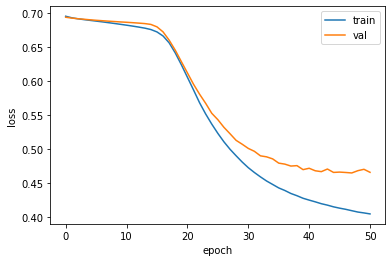

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [17]:
#원-핫 인코딩 사용으로 인해 입력 데이터가 커짐
print(train_seq.nbytes,train_oh.nbytes)

8000000 4000000000


###Word Embedding

In [18]:
model2=keras.Sequential()

model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [19]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)

model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history=model2.fit(train_seq,train_target,epochs=100,batch_size=64,
                  validation_data=(val_seq,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 16ms/step - loss: 0.6963 - accuracy: 0.5059 - val_loss: 0.6920 - val_accuracy: 0.5160
Epoch 2/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6890 - accuracy: 0.5397 - val_loss: 0.6793 - val_accuracy: 0.5996
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6722 - accuracy: 0.6275 - val_loss: 0.6606 - val_accuracy: 0.6560
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6501 - accuracy: 0.6920 - val_loss: 0.6478 - val_accuracy: 0.6682
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6350 - accuracy: 0.7054 - val_loss: 0.6261 - val_accuracy: 0.7190
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6172 - accuracy: 0.7323 - val_loss: 0.6204 - val_accuracy: 0.6978
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6051 - accuracy: 0.7354 - val_loss: 0.6017 - val_accuracy:

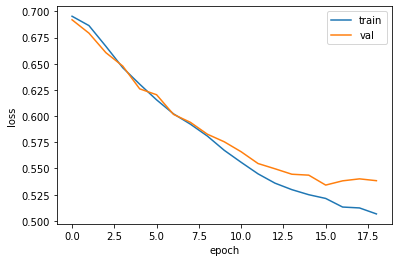

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

##LSTM

In [21]:
from tensorflow import keras

model=keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [22]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history=model.fit(train_seq,train_target,epochs=100,batch_size=64,
                  validation_data=(val_seq,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 34ms/step - loss: 0.6922 - accuracy: 0.5543 - val_loss: 0.6903 - val_accuracy: 0.5946
Epoch 2/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6888 - accuracy: 0.6178 - val_loss: 0.6837 - val_accuracy: 0.6434
Epoch 3/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6799 - accuracy: 0.6530 - val_loss: 0.6585 - val_accuracy: 0.6698
Epoch 4/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6333 - accuracy: 0.7000 - val_loss: 0.5669 - val_accuracy: 0.7276
Epoch 5/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5560 - accuracy: 0.7310 - val_loss: 0.5352 - val_accuracy: 0.7436
Epoch 6/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5264 - accuracy: 0.7515 - val_loss: 0.5129 - val_accuracy: 0.7624
Epoch 7/100
313/313 [==============================] - 10s 32ms/step - loss: 0.4989 - accuracy: 0.7743 - val_loss: 0.4962 - val_ac

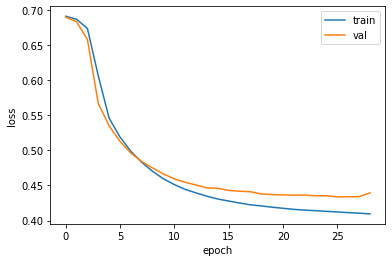

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

###Dropout

Epoch 1/100
313/313 [==============================] - 14s 36ms/step - loss: 0.6929 - accuracy: 0.5123 - val_loss: 0.6915 - val_accuracy: 0.5796
Epoch 2/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6908 - accuracy: 0.5867 - val_loss: 0.6875 - val_accuracy: 0.6426
Epoch 3/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6851 - accuracy: 0.6343 - val_loss: 0.6580 - val_accuracy: 0.6026
Epoch 4/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6437 - accuracy: 0.6440 - val_loss: 0.6007 - val_accuracy: 0.7434
Epoch 5/100
313/313 [==============================] - 10s 33ms/step - loss: 0.5999 - accuracy: 0.7403 - val_loss: 0.5827 - val_accuracy: 0.7498
Epoch 6/100
313/313 [==============================] - 11s 34ms/step - loss: 0.5800 - accuracy: 0.7478 - val_loss: 0.5688 - val_accuracy: 0.7522
Epoch 7/100
313/313 [==============================] - 11s 34ms/step - loss: 0.5662 - accuracy: 0.7519 - val_loss: 0.5563 - val_ac

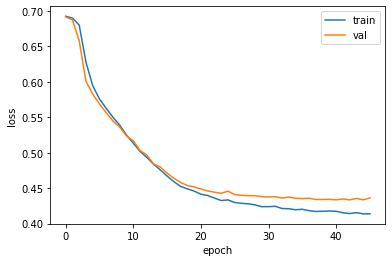

In [24]:
model2=keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.LSTM(8,dropout=0.3))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)

model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history=model2.fit(train_seq,train_target,epochs=100,batch_size=64,
                  validation_data=(val_seq,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

###Connect 2 layers

In [25]:
model3=keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True))
model3.add(keras.layers.LSTM(8,dropout=0.3))
model3.add(keras.layers.Dense(1,activation='sigmoid'))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 24s 68ms/step - loss: 0.6928 - accuracy: 0.5194 - val_loss: 0.6923 - val_accuracy: 0.5370
Epoch 2/100
313/313 [==============================] - 21s 66ms/step - loss: 0.6912 - accuracy: 0.5640 - val_loss: 0.6880 - val_accuracy: 0.6190
Epoch 3/100
313/313 [==============================] - 20s 65ms/step - loss: 0.6824 - accuracy: 0.6428 - val_loss: 0.6571 - val_accuracy: 0.6530
Epoch 4/100
313/313 [==============================] - 20s 65ms/step - loss: 0.6307 - accuracy: 0.6707 - val_loss: 0.5654 - val_accuracy: 0.7200
Epoch 5/100
313/313 [==============================] - 20s 65ms/step - loss: 0.5602 - accuracy: 0.7234 - val_loss: 0.5305 - val_accuracy: 0.7510
Epoch 6/100
313/313 [==============================] - 20s 65ms/step - loss: 0.5293 - accuracy: 0.7449 - val_loss: 0.5077 - val_accuracy: 0.7612
Epoch 7/100
313/313 [==============================] - 20s 65ms/step - loss: 0.5071 - accuracy: 0.7620 - val_loss: 0.4943 - val_ac

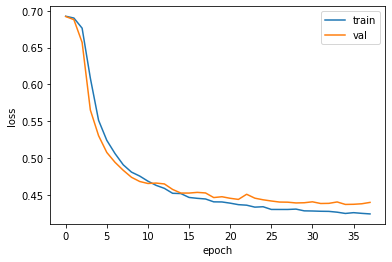

In [26]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)

model3.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history=model3.fit(train_seq,train_target,epochs=100,batch_size=64,
                  validation_data=(val_seq,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

##GRU

In [27]:
model4=keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1,activation='sigmoid'))

model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 13s 36ms/step - loss: 0.6929 - accuracy: 0.5092 - val_loss: 0.6917 - val_accuracy: 0.5478
Epoch 2/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6909 - accuracy: 0.5683 - val_loss: 0.6886 - val_accuracy: 0.6042
Epoch 3/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6870 - accuracy: 0.6151 - val_loss: 0.6830 - val_accuracy: 0.6240
Epoch 4/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6801 - accuracy: 0.6338 - val_loss: 0.6731 - val_accuracy: 0.6376
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6669 - accuracy: 0.6548 - val_loss: 0.6552 - val_accuracy: 0.6558
Epoch 6/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6454 - accuracy: 0.6654 - val_loss: 0.6208 - val_accuracy: 0.6822
Epoch 7/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5990 - accuracy: 0.6976 - val_loss: 0.5428 - val_ac

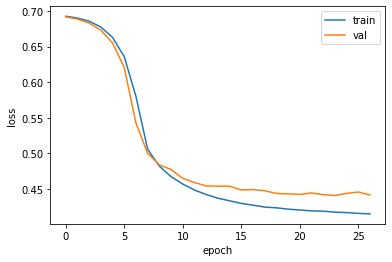

In [28]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)

model4.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history=model4.fit(train_seq,train_target,epochs=100,batch_size=64,
                  validation_data=(val_seq,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

##Test Reuslt

In [29]:
test_seq=pad_sequences(test_input,maxlen=100)
rnn_model=keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq,test_target)

782/782 [==============================] - 9s 10ms/step - loss: 0.4346 - accuracy: 0.7972


[0.43463221192359924, 0.7972000241279602]